In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

<AxesSubplot:>

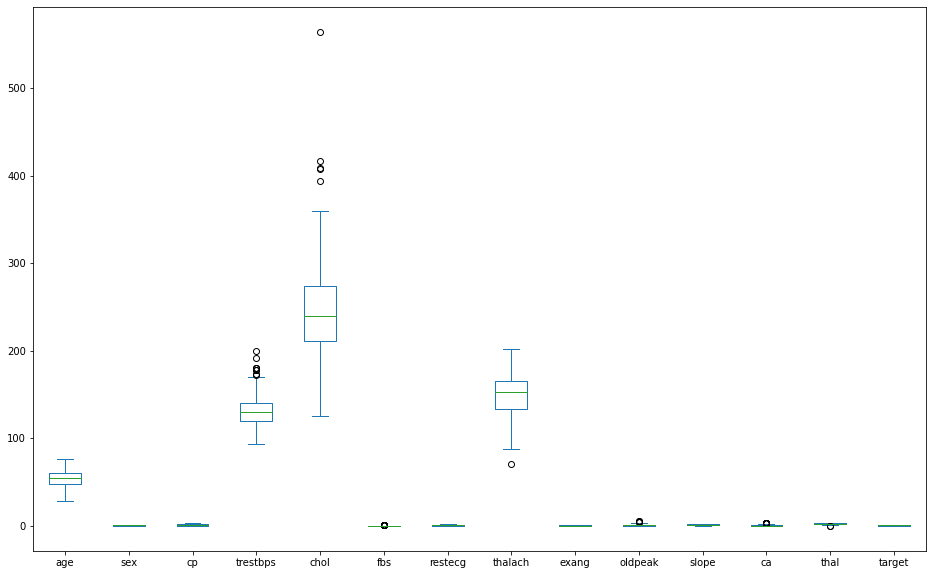

In [10]:
df.plot(kind = "box", figsize = (16,10))

In [11]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers
for i in df.columns:
    sample_outliers = detect_outliers_iqr(df[i])
    print("Outliers from IQR method: ", len(sample_outliers))


Outliers from IQR method:  0
Outliers from IQR method:  0
Outliers from IQR method:  0
Outliers from IQR method:  9
Outliers from IQR method:  5
Outliers from IQR method:  45
Outliers from IQR method:  0
Outliers from IQR method:  1
Outliers from IQR method:  0
Outliers from IQR method:  5
Outliers from IQR method:  0
Outliers from IQR method:  25
Outliers from IQR method:  2
Outliers from IQR method:  0


In [12]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df)

In [13]:
df2=transformer.transform(df)

In [14]:
df2=pd.DataFrame(df2,columns=df.columns)

In [15]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.592593,0.0,1.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,-1.0,0.0,-1.0,0.0
1,-1.333333,0.0,0.5,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,-1.0,0.0,0.0,0.0
2,-1.037037,-1.0,0.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,1.0,0.0,0.0,0.0
3,0.074074,0.0,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,1.0,0.0,0.0,0.0
4,0.148148,-1.0,-0.5,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,-1.0,-0.5,0.50,0.015748,0.0,0.0,-0.923077,1.0,-0.3750,0.0,0.0,1.0,-1.0
299,-0.740741,0.0,1.0,-1.00,0.377953,0.0,0.0,-0.646154,0.0,0.2500,0.0,0.0,1.0,-1.0
300,0.962963,0.0,-0.5,0.70,-0.740157,1.0,0.0,-0.369231,0.0,1.6250,0.0,2.0,1.0,-1.0
301,0.148148,0.0,-0.5,0.00,-1.716535,0.0,0.0,-1.169231,1.0,0.2500,0.0,1.0,1.0,-1.0


<AxesSubplot:>

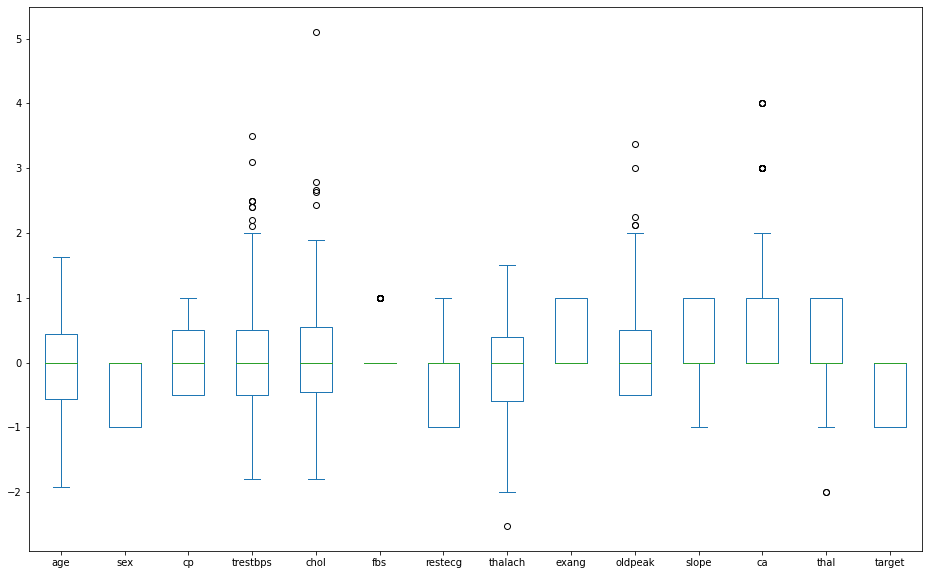

In [16]:
df2.plot(kind = "box", figsize = (16,10))

In [17]:
from sklearn.linear_model import LinearRegression

y=df2["target"]
x=df2.drop("target", axis=1)
regressor=LinearRegression()


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = regressor.predict(X_test)
y_pred

array([-0.93198528, -0.28318003, -0.26320206, -0.98697621, -0.76393405,
       -0.48056707, -0.8167073 , -0.73137918, -1.18844421, -1.23819858,
       -0.34763596, -0.10074591, -0.89170208, -0.23784782, -0.00597105,
       -0.37751845, -0.82719393, -0.34856183, -1.14748662, -0.24337395,
       -0.27746363, -0.5484691 , -0.74932292, -0.75881659, -0.19850782,
       -0.4181673 , -0.6813415 , -0.51645243,  0.06023388, -0.39297585,
       -0.37865222, -1.05702169,  0.00480281, -0.34092431, -0.13439757,
       -0.42505816, -0.92994657, -0.22449695, -0.81822187, -0.68410807,
       -0.33172234, -0.26268329, -0.57397683, -0.81262244, -0.48041747,
       -0.35397329, -0.24983667, -0.40485886, -0.86065135, -0.26337355,
       -0.21727371, -0.43214914,  0.00228097, -0.22795332,  0.25304618,
       -0.75265162, -0.06577818, -0.12253752, -0.30817889, -0.04516229,
       -0.28198124])

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4690443546615125

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_pred1 = regressor.predict(X_test)
accuracy_score(y_test, y_pred1)

0.8360655737704918

In [23]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian.score(X_test,y_test)

0.8524590163934426

In [24]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=0)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.8032786885245902

In [25]:
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, x,y, cv=5)
score_ppn.mean()

0.735846994535519

In [26]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier #Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
randomforest.score(X_test,y_test)

0.8524590163934426

In [27]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.8360655737704918

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
for i in range(10):
    tree.fit(X_train, y_train)
    print(tree.score(X_test,y_test))

0.7868852459016393
0.7704918032786885
0.7540983606557377
0.7704918032786885
0.7704918032786885
0.7704918032786885
0.7868852459016393
0.7540983606557377
0.7868852459016393
0.7868852459016393


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

        -1.0       0.84      0.78      0.81        27
         0.0       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [30]:
print(confusion_matrix(y_test, y_pred1))

[[21  6]
 [ 4 30]]


In [31]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [32]:
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.8429752066115702
0.819672131147541


In [33]:
y_pred2= classifier.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred)  

array([[16, 11],
       [ 1, 33]], dtype=int64)